In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading cleaned data 

offense_data = {}
offence_amount =[]
years = [2005, 2006, 2007, 2008, 2009, 2010]
for year in years:
    print (f"Reading data for the year: {year}")
    offense_data[year] = pd.read_csv("../data/cleaned_data/TX0840400_" + str(year) + ".csv")
    offence_amount.append(offense_data[year].index[-1])

Reading data for the year: 2005
Reading data for the year: 2006
Reading data for the year: 2007
Reading data for the year: 2008
Reading data for the year: 2009
Reading data for the year: 2010


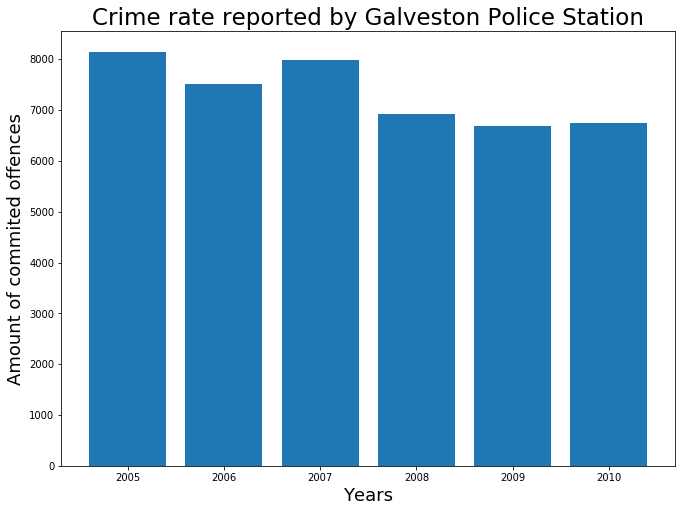

In [3]:
# creating bar chart for each year and reviewing data

plt.figure(figsize=(11,8))
plt.bar(years, offence_amount)
plt.xlabel ("Years", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Crime rate reported by Galveston Police Station",  fontsize=23)
plt.savefig ("../data/cleaned_data/galveston_crime_yearly.png")


In [4]:
# Adding new column which will hold only month of the incident
# counting amount of offences each month 
offense_data_grouped = {}
for year in years:
    offense_data[year]["month"] = offense_data[year]["incident_date"].str[5:7]
    offense_data_grouped[year] = offense_data[year].groupby(offense_data[year]["month"]).incident_date.count()

monthly_offenses_df = pd.DataFrame(offense_data_grouped)
monthly_offenses_df

,2005,2006,2007,2008,2009,2010
month,,,,,,
01,619,630,633,499,481,509
02,541,545,579,547,484,462
03,658,611,687,621,444,632
04,773,644,701,719,512,547
05,772,748,744,635,637,581
06,694,669,791,661,611,607
07,773,702,755,710,674,657
08,813,656,703,761,657,695
09,579,620,637,375,587,592


In [5]:
# calculating mean for 2005-2007 (befor hurricane) and 2009-2010 (after hurricane)
monthly_offenses_df["mean_2005-2007"] = (monthly_offenses_df[2005]+monthly_offenses_df[2006]+monthly_offenses_df[2007])/3
monthly_offenses_df["mean_2009-2010"] = (monthly_offenses_df[2009]+monthly_offenses_df[2010])/2
monthly_offenses_df

,2005,2006,2007,2008,2009,2010,mean_2005-2007,mean_2009-2010
month,,,,,,,,
01,619,630,633,499,481,509,627.333333,495.0
02,541,545,579,547,484,462,555.000000,473.0
03,658,611,687,621,444,632,652.000000,538.0
04,773,644,701,719,512,547,706.000000,529.5
05,772,748,744,635,637,581,754.666667,609.0
06,694,669,791,661,611,607,718.000000,609.0
07,773,702,755,710,674,657,743.333333,665.5
08,813,656,703,761,657,695,724.000000,676.0
09,579,620,637,375,587,592,612.000000,589.5


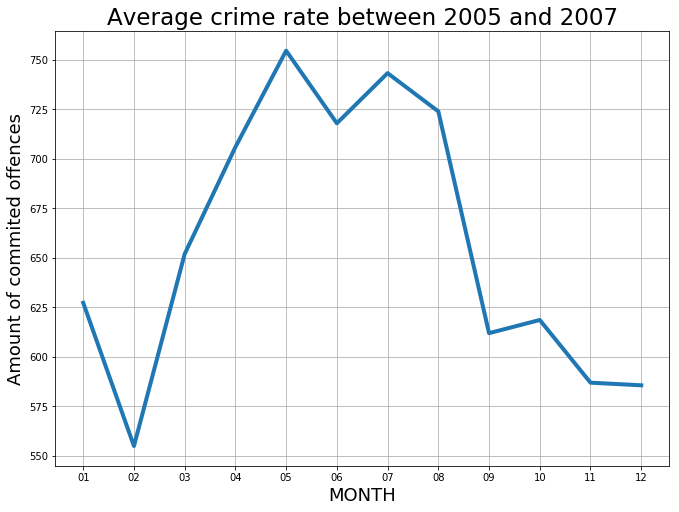

In [6]:
# plotting average crime rate before hurricane

plt.figure(figsize=(11,8))
plt.plot(monthly_offenses_df["mean_2005-2007"], lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Average crime rate between 2005 and 2007",  fontsize=23)
plt.grid()
plt.savefig ("../data/cleaned_data/galveston_ave_crime_2005_2007.png")


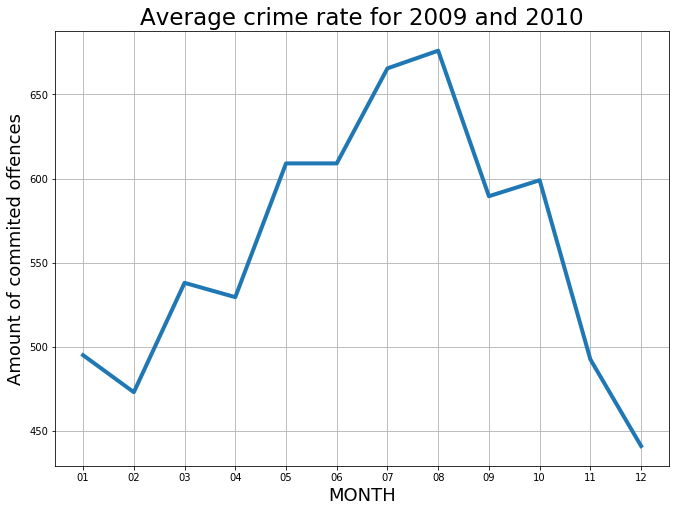

In [7]:
# plotting average crime rate after hurricane

plt.figure(figsize=(11,8))
plt.plot(monthly_offenses_df["mean_2009-2010"], lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Average crime rate for 2009 and 2010",  fontsize=23)
plt.grid()
plt.savefig ("../data/cleaned_data/galveston_ave_crime_2009_2010.png")




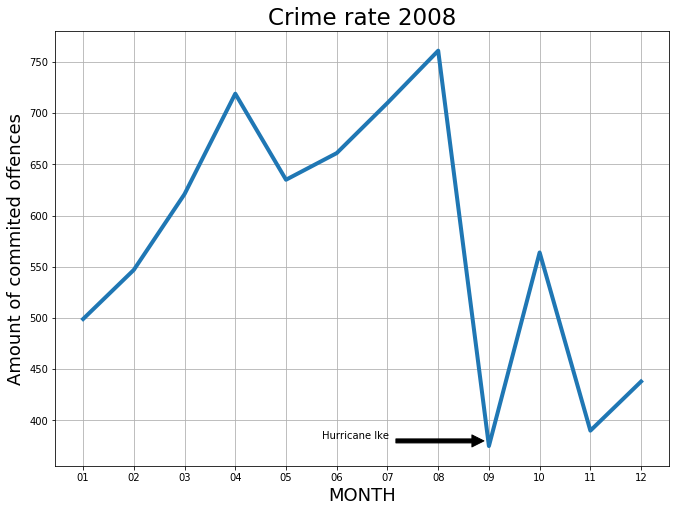

In [8]:
# plotting crime rate during hurricane Ike - 1-15 september of 2008


plt.figure(figsize=(11,8))
plt.plot(monthly_offenses_df[2008], lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Crime rate 2008",  fontsize=23)
plt.grid()



plt.annotate('Hurricane Ike',
            xy=(8, 380), xycoords='data',
            xytext=(-100, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')


plt.savefig ("../data/cleaned_data/galveston_crime_2008.png")


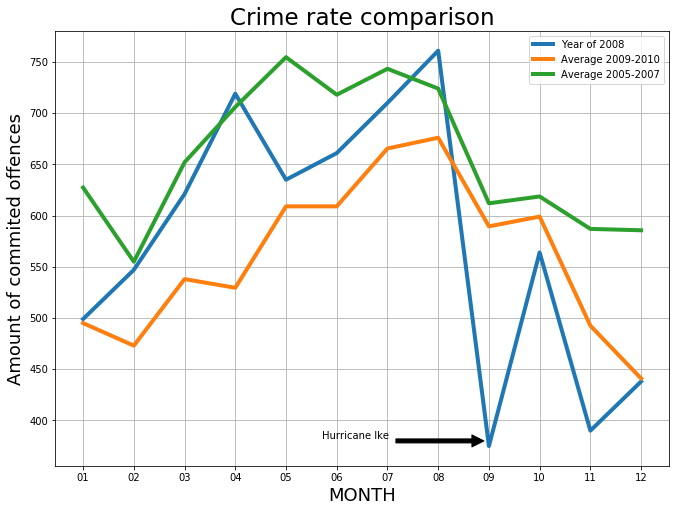

In [9]:
# Extracting data we need for final comparicing plot and creating graph
import warnings
warnings.filterwarnings('ignore')

final_plot_data = monthly_offenses_df[[2008,"mean_2009-2010", "mean_2005-2007" ]]
final_plot_data.rename(columns={2008:"Year of 2008", "mean_2009-2010":"Average 2009-2010", "mean_2005-2007":"Average 2005-2007"}, inplace=True)


plt.figure(figsize=(11,8))
plt.plot(final_plot_data, lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Crime rate comparison",  fontsize=23)
plt.grid()
plt.legend(final_plot_data)

plt.annotate('Hurricane Ike',
            xy=(8, 380), xycoords='data',
            xytext=(-100, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')


plt.savefig ("../data/cleaned_data/galveston_crime_comparison.png")




In [10]:
# Reading cleaned data for VA

offense_data = {}
offence_amount =[]
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
for year in years:
    print (f"Reading data for the year: {year}")
    offense_data[year] = pd.read_csv("../data/cleaned_data/louisa_stations_" + str(year) + ".csv")
    offence_amount.append(offense_data[year].index[-1])

Reading data for the year: 2008
Reading data for the year: 2009
Reading data for the year: 2010
Reading data for the year: 2011
Reading data for the year: 2012
Reading data for the year: 2013
Reading data for the year: 2014


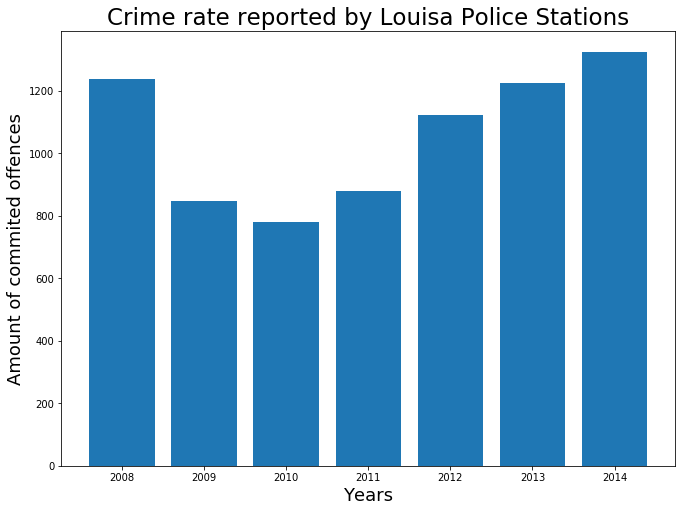

In [11]:
# creating bar chart for each year and reviewing data

plt.figure(figsize=(11,8))
plt.bar(years, offence_amount)
plt.xlabel ("Years", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Crime rate reported by Louisa Police Stations",  fontsize=23)
plt.savefig ("../data/cleaned_data/Louisa_crime_yearly.png")

In [12]:
# Adding new column which will hold only month of the incident
# counting amount of offences each month 
offense_data_grouped = {}
for year in years:
    offense_data[year]["month"] = offense_data[year]["incident_date"].str[5:7]
    offense_data_grouped[year] = offense_data[year].groupby(offense_data[year]["month"]).incident_date.count()

monthly_offenses_df = pd.DataFrame(offense_data_grouped)
monthly_offenses_df

,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,
01,107,86,63,75,19,108,103
02,97,62,15,82,79,78,87
03,91,108,26,91,50,115,118
04,90,96,39,90,108,92,98
05,105,135,61,81,120,100,125
06,106,50,91,69,100,98,123
07,117,27,95,78,118,111,121
08,124,56,82,70,123,113,116
09,93,58,73,58,114,91,107


In [13]:
# calculating mean for 2008-2010 (befor earthquake) and 2012-2014 (after hurricane)
monthly_offenses_df["mean_2008-2010"] = (monthly_offenses_df[2008]+monthly_offenses_df[2009]+monthly_offenses_df[2010])/3
monthly_offenses_df["mean_2012-2014"] = (monthly_offenses_df[2012]+monthly_offenses_df[2013]+monthly_offenses_df[2014])/3
monthly_offenses_df

,2008,2009,2010,2011,2012,2013,2014,mean_2008-2010,mean_2012-2014
month,,,,,,,,,
01,107,86,63,75,19,108,103,85.333333,76.666667
02,97,62,15,82,79,78,87,58.000000,81.333333
03,91,108,26,91,50,115,118,75.000000,94.333333
04,90,96,39,90,108,92,98,75.000000,99.333333
05,105,135,61,81,120,100,125,100.333333,115.000000
06,106,50,91,69,100,98,123,82.333333,107.000000
07,117,27,95,78,118,111,121,79.666667,116.666667
08,124,56,82,70,123,113,116,87.333333,117.333333
09,93,58,73,58,114,91,107,74.666667,104.000000


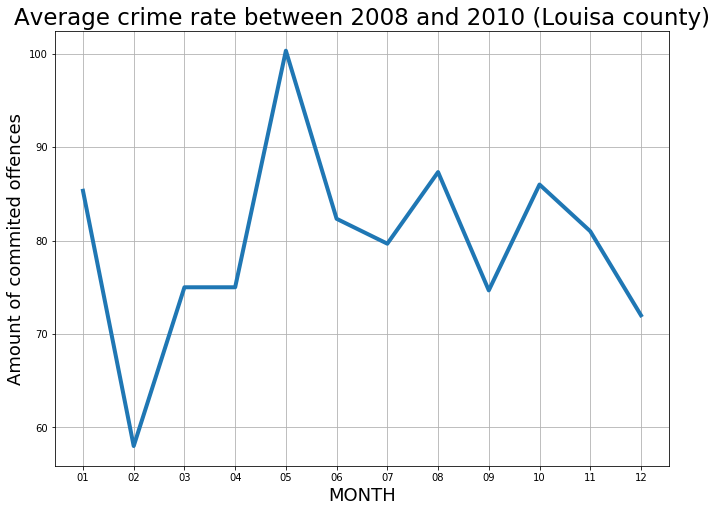

In [14]:
# plotting average crime rate before earthquake

plt.figure(figsize=(11,8))
plt.plot(monthly_offenses_df["mean_2008-2010"], lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Average crime rate between 2008 and 2010 (Louisa county)",  fontsize=23)
plt.grid()
plt.savefig ("../data/cleaned_data/louisa_ave_crime_2008_2010.png")


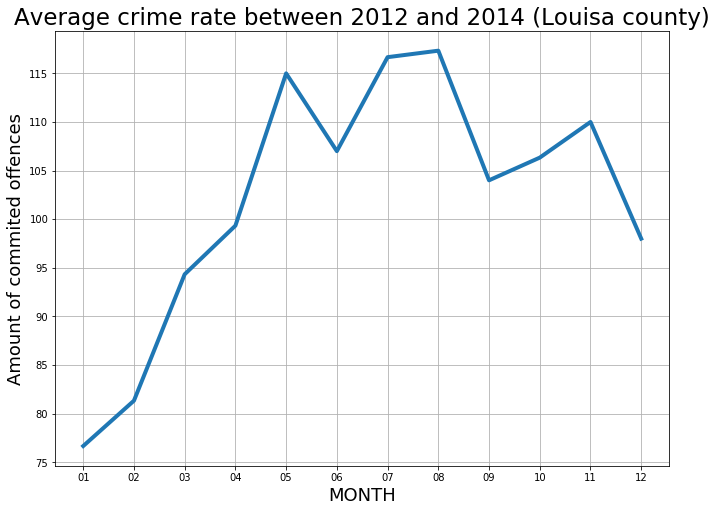

In [15]:
# plotting average crime rate after earthquake

plt.figure(figsize=(11,8))
plt.plot(monthly_offenses_df["mean_2012-2014"], lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Average crime rate between 2012 and 2014 (Louisa county)",  fontsize=23)
plt.grid()
plt.savefig ("../data/cleaned_data/louisa_ave_crime_2012_2014.png")


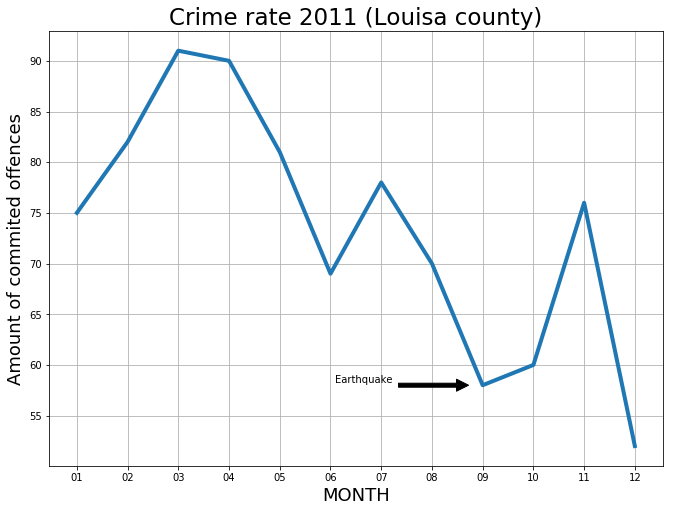

In [16]:
# plotting crime rate during earthquake - 23 august 2011


plt.figure(figsize=(11,8))
plt.plot(monthly_offenses_df[2011], lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Crime rate 2011 (Louisa county)",  fontsize=23)
plt.grid()

plt.annotate('Earthquake',
            xy=(7.8, 58), xycoords='data',
            xytext=(-80, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')


plt.savefig ("../data/cleaned_data/louisa_crime_2011.png")


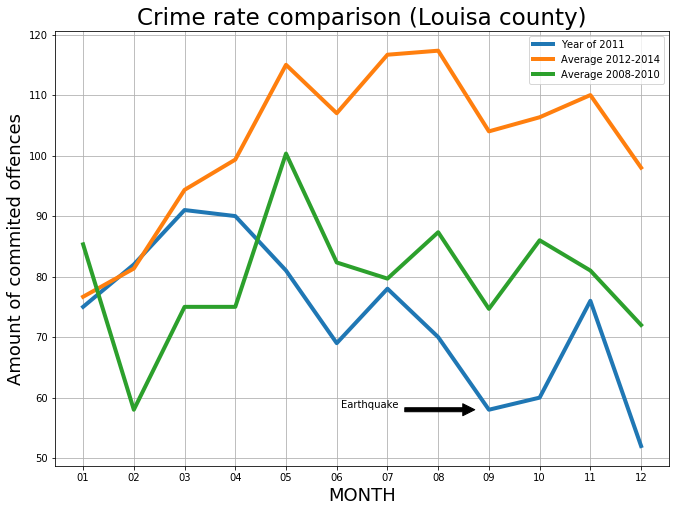

In [17]:
# Extracting data we need for final comparicing plot and creating graph
import warnings
warnings.filterwarnings('ignore')

final_plot_data = monthly_offenses_df[[2011,"mean_2012-2014", "mean_2008-2010" ]]
final_plot_data.rename(columns={2011:"Year of 2011", "mean_2012-2014":"Average 2012-2014", "mean_2008-2010":"Average 2008-2010"}, inplace=True)


plt.figure(figsize=(11,8))
plt.plot(final_plot_data, lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Crime rate comparison (Louisa county)",  fontsize=23)
plt.grid()
plt.legend(final_plot_data)

plt.annotate('Earthquake',
            xy=(7.8, 58), xycoords='data',
            xytext=(-80, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

plt.savefig ("../data/cleaned_data/louisa_crime_comparison.png")
